[32.73509859 32.58051134]


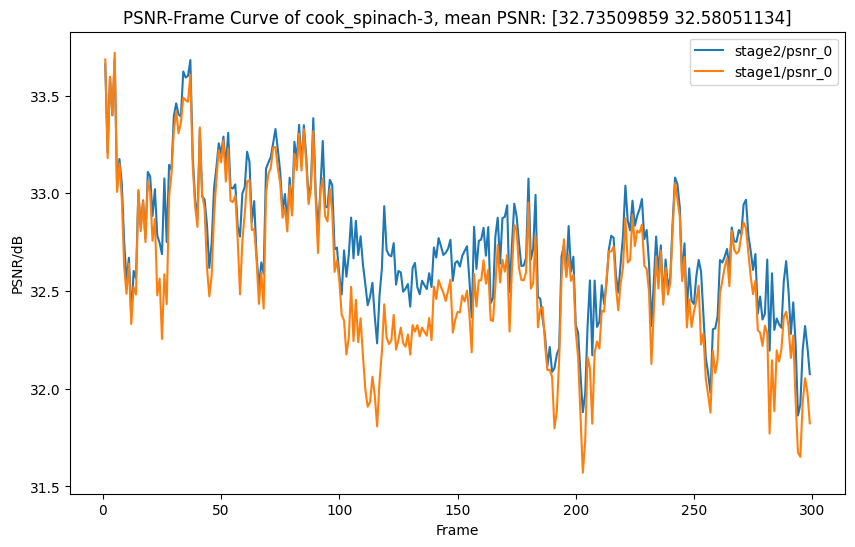

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# 确保在 Jupyter Notebook 中正确显示图表
%matplotlib inline
# scene = 'flame_steak-ori-1'
scene = 'cook_spinach-3'
# scene = 'flame_salmon_1'

path = f'/SDD_D/zwk/output/{scene}/'
# path = f'/SDD_D/zwk/3DGStream/output/ori/'

metric = ['stage2/psnr_0', 'stage1/psnr_0']
data_all = {}



for frame in os.listdir(path):
    if not frame.startswith('frame'):
        continue
    if not os.path.exists(os.path.join(path, frame, 'results.json')):
        continue
    with open(os.path.join(path, frame, 'results.json')) as f:
        data = json.load(f)
        data_all[frame] = [data[m] for m in metric]

# 计算PSNR的平均值
data_mean = np.mean(np.array(list(data_all.values())), axis=0)
print(data_mean)

df = pd.DataFrame(data_all, index=metric).T
df.index = [int(f.split('frame')[1]) for f in df.index]
df = df.sort_index()


plt.figure(figsize=(10, 6))
plt.plot(df.index, df[metric[0]])
plt.plot(df.index, df[metric[1]])
plt.legend(metric)
plt.xlabel('Frame')
plt.ylabel('PSNR/dB')
plt.title(f'PSNR-Frame Curve of {scene}, mean PSNR: {data_mean}')
plt.show()

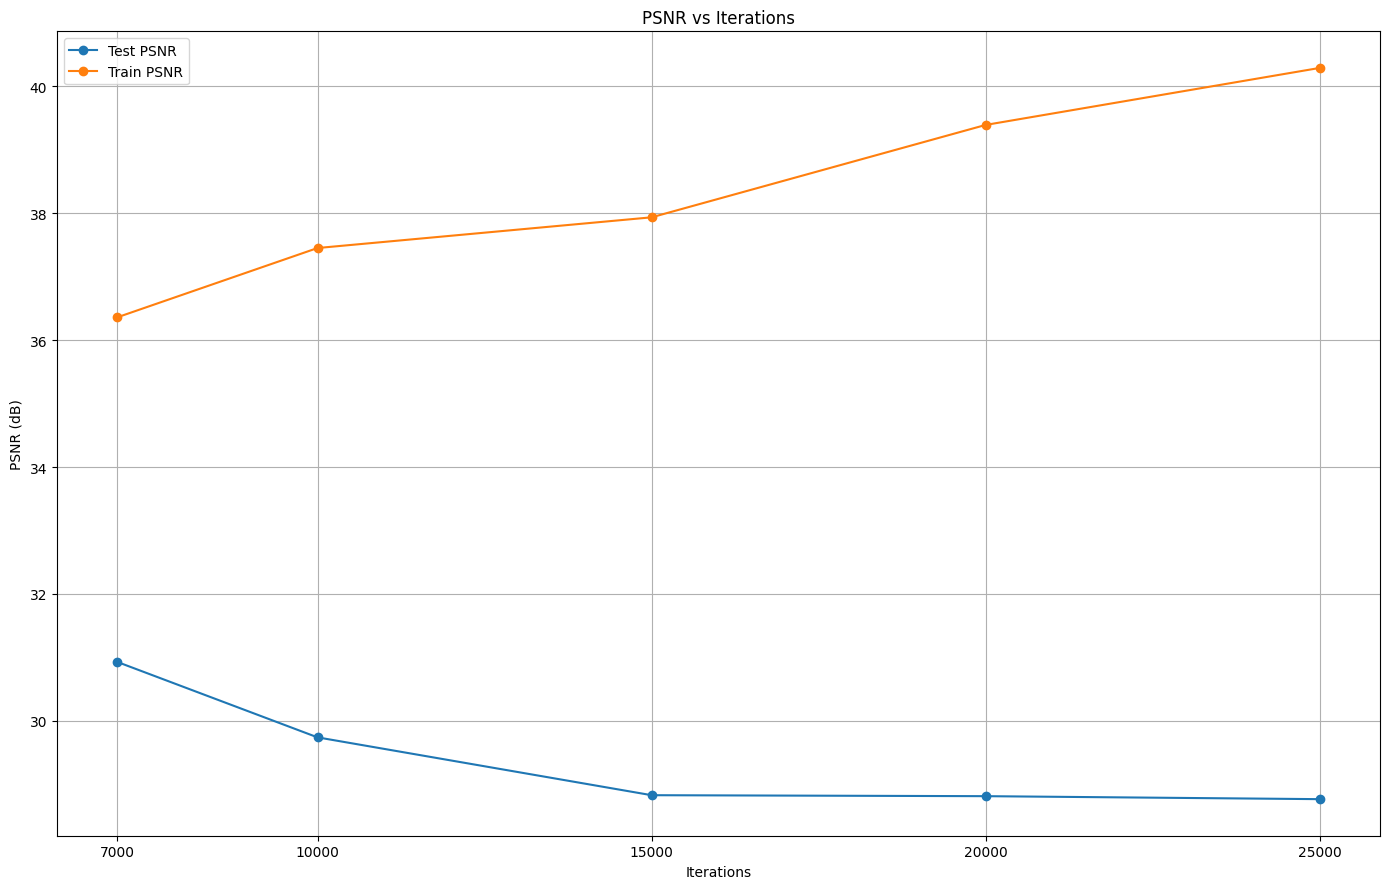

In [4]:
import matplotlib.pyplot as plt  

# Iterations and corresponding PSNR values from the data  
iterations = [7000, 10000, 15000, 20000, 25000]  
test_psnr = [  
    30.929568,  # PSNR for iter 7000  
    29.739625,  # PSNR for iter 10000  
    28.827852,  # PSNR for iter 15000  
    28.812559,  # PSNR for iter 20000  
    28.765457   # PSNR for iter 25000  
]  
train_psnr = [  
    36.358870,  # PSNR for iter 7000  
    37.452173,  # PSNR for iter 10000  
    37.936252,  # PSNR for iter 15000  
    39.392686,  # PSNR for iter 20000  
    40.291337   # PSNR for iter 25000  
]  

# Create the plot  
plt.figure(figsize=(14, 9))  
plt.plot(iterations, test_psnr, label='Test PSNR', marker='o')  
plt.plot(iterations, train_psnr, label='Train PSNR', marker='o')  

# Add titles and labels  
plt.title('PSNR vs Iterations')  
plt.xlabel('Iterations')  
plt.ylabel('PSNR (dB)')  
plt.xticks(iterations)  
plt.legend()  
plt.grid(True)  

# Show the plot  
plt.tight_layout()  
plt.show()

In [ ]:
#### 05 COLMAP使用与数据集处理
# delete all frames
import os
import shutil
for scene in ['coffee_martini', 'cook_spinach', 'sear_steak', 'cut_roasted_beef']:
    path = f'/SDD_D/zwk/data_dynamic/dynerf/{scene}'
    for file in os.listdir(path):
        if file.startswith('frame'):
            shutil.rmtree(os.path.join(path, file))

# preprocess frame0
import os
path = '/SDD_D/zwk/data_dynamic/dynerf/' 

for scene in ['flame_salmon_1']:
# for scene in os.listdir(path):
    instruction = f"python dataset_preprocess.py --videopath {os.path.join(path, scene)} --startframe 0 --endframe 1"
    os.system(instruction)
# copy frame0 to frames
import os
import shutil
path = '/SDD_D/zwk/data_dynamic/dynerf'

def mkdir_frames(source, scene, start, end):
    for i in range(start, end):
        frame_dir = os.path.join(scene, f'frame{i:06d}')
        if not os.path.exists(frame_dir):
            os.makedirs(frame_dir)
            print(f"Created {frame_dir}")


def copy_sparse_to_frames(source, scene):
    sparse_dir = os.path.join(source, 'sparse')
    assert os.path.isdir(sparse_dir), f"Error: The directory '{sparse_dir}' does not exist."

    for item in os.listdir(scene):
        frame_dir = os.path.join(scene, item)
        if os.path.isdir(frame_dir) and item.startswith('frame') and not item.endswith('000000'):
            dest_sparse_dir = os.path.join(frame_dir, 'sparse')
            if os.path.exists(dest_sparse_dir):
                shutil.rmtree(dest_sparse_dir)
            shutil.copytree(sparse_dir, dest_sparse_dir)
            print(f"Copied to {dest_sparse_dir}")

def copy_distorted_to_scene(source, scene):
    distorted_dir = os.path.join(source, 'distorted')
    assert os.path.isdir(distorted_dir), f"Error: The directory '{distorted_dir}' does not exist."

    dest_distorted_dir = os.path.join(scene, 'distorted')
    if os.path.exists(dest_distorted_dir):
        shutil.rmtree(dest_distorted_dir)
    shutil.copytree(distorted_dir, dest_distorted_dir)
    print(f"Copied to {dest_distorted_dir}")

for scene in ['flame_salmon_1']:
    frame0_path = os.path.join(path, scene, 'frame000000')
    scene_path = os.path.join(path, scene)

    mkdir_frames(frame0_path, scene_path, 1, 300)
    copy_sparse_to_frames(frame0_path, scene_path)
    copy_distorted_to_scene(frame0_path, scene_path)
import os
path = '/SDD_D/zwk/data_dynamic/dynerf/'

for scene in ['flame_salmon_1']:
# for scene in os.listdir(path):
    instruction = f"python dataset_preprocess.py --videopath {os.path.join(path, scene)} --startframe 1 --endframe 300"
    os.system(instruction)


# resize
import os
import shutil
path = '/SDD_D/zwk/data_dynamic/dynerf'


def resize_frame(source_path, frame_id, resize_factor):
    frame_id = f'{frame_id:0>6}'
    inputDir='frame' + frame_id
    print("Processing "+inputDir)

    os.makedirs(os.path.join(source_path, inputDir, f"images_{resize_factor}"), exist_ok=True)
    files = os.listdir(os.path.join(source_path, inputDir, "images"))
    for file in files:
        source_file = os.path.join(source_path, inputDir, "images", file)
        destination_file = os.path.join(source_path, inputDir, f"images_{resize_factor}", file)
        shutil.copy2(source_file, destination_file)
        print("Resizing " + source_file + " to " + destination_file)
        os.system('convert '+ source_file + f" -resize {(1 / resize_factor):.1%}% " + destination_file)


for scene in ['coffee_martini', 'cook_spinach', 'sear_steak', 'cut_roasted_beef']:
    frame0_path = os.path.join(path, scene, 'frame000000')
    scene_path = os.path.join(path, scene)

    for i in range(0, 1):
        resize_frame(scene_path, i, 2)

In [39]:
import os
from plyfile import PlyData, PlyElement
import numpy as np
import torch
scene = 'flame_steak-7'
plydata = PlyData.read(f'/SDD_D/zwk/init_3dgs/{scene}/frame000000/point_cloud/iteration_7000/point_cloud.ply')

xyz = np.stack((np.asarray(plydata.elements[0]["x"]),
                    np.asarray(plydata.elements[0]["y"]),
                    np.asarray(plydata.elements[0]["z"])),  axis=1)

xyz = torch.tensor(xyz, dtype=torch.float, device="cuda")

torch.max(xyz, dim = 0)


torch.return_types.max(
values=tensor([34.4981, 30.3051, 35.4002], device='cuda:0'),
indices=tensor([182636,  55679, 114624], device='cuda:0'))